In [1]:
!python --version

In [2]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline 

## Constants

\begin{align}
\Omega
\end{align}

Om0 = initial Ω rotation of earth in radians/years, with respect to distant stars

\begin{align}
\omega
\end{align}

om0 = initial ω revolution of moon in radians/secs

\begin{align}
M
\end{align}

M = mass of Earth

\begin{align}
R
\end{align}

R = radius of Earth

\begin{align}
N_{B}
\end{align}

NB = Normal force N_B

\begin{align}
r
\end{align}

r = radius of moon's orbit

\begin{align}
m
\end{align}

m = mass of moon

\begin{align}
\eta
\end{align}

eta = (see chapter 2)

\begin{align}
\mu
\end{align}

u = coefficient of friction(numerically solved)

\begin{align}
G
\end{align}

G = Gravitational constant in m^3 kg^-1 yr^-2

\begin{align}
\gamma
\end{align}

Y = G*M

# The Equations

\begin{align}
-\mu_{k}N_{B}(\Omega-\omega)=\frac{2}{5}MR_{E}\Omega\bigg(\frac{d\Omega}{dt}\bigg)
\end{align}

\begin{align}
\frac{6}{5}\eta MR^{2}_{E}\Omega\bigg(\frac{d\Omega}{dt}\bigg)=\gamma^{\frac{2}{3}}m\omega^{-\frac{1}{3}}\bigg(\frac{d\omega}{dt}\bigg)
\end{align}

\begin{align}
r=\gamma^{\frac{1}{3}}\omega^{-\frac{2}{3}}
\end{align}

### For The Rotational Velocity Ω(t) and Angular Velocity ω(t) of the Earth and Moon respectively:

\begin{align}
-\mu_{k}N_{B}(\Omega-\omega)=\frac{2}{5}MR_{E}\Omega\bigg(\frac{d\Omega}{dt}\bigg)
\end{align}

\begin{align}
\frac{6}{5}\eta MR^{2}_{E}\Omega\bigg(\frac{d\Omega}{dt}\bigg)=\gamma^{\frac{2}{3}}m\omega^{-\frac{1}{3}}\bigg(\frac{d\omega}{dt}\bigg)
\end{align}

\begin{align}
\bigg(\frac{d\Omega}{dt}\bigg)=-\frac{5}{2}\frac{\mu_{k}N_{B}(\Omega-\omega)}{MR_{E}\Omega},\bigg(\frac{d\omega}{dt}\bigg)=\frac{6}{5}\frac{\eta MR^{2}_{E}\Omega}{\gamma^{\frac{2}{3}}m\omega^{-\frac{1}{3}}}\bigg(\frac{d\Omega}{dt}\bigg)
\end{align}

In [6]:
Om0=2301.21649
om0=84.889944
M=5.972*(10**24.0)
R=6371000.0
NB=1.02992455*(10**37) 
r=1737400.0  
m=7.34767309*(10**22.0)
eta=1.0/30.0 
u=0.5731*10**(-12) 
G=66425.34 
Y = G*M

def W_dt(W, t):
    return [(-5*u*NB*(W[0]-W[1]))/(2*M*R*W[0]), 
            ((6*eta*M*(R**2)*W[0])/(5*Y**(2/3)*m*W[1]**(-1/3)))*(-5*u*NB*(W[0]-W[1]))/(2*M*R*W[0])]

ts = np.arange(0,10*10**10,10**7)
W0 = [Om0, om0]
Ws = odeint(W_dt, W0, ts)
earth = Ws[:,0]
moon = Ws[:,1]

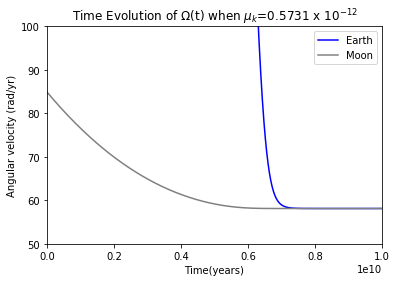

In [7]:
plt.plot(ts, earth, label="Earth", c='blue')
plt.plot(ts, moon, label="Moon", c='gray')
plt.xlabel("Time(years)")
plt.ylabel("Angular velocity (rad/yr)")
plt.title('Time Evolution of $\Omega$(t) when $\mu$$_k$=0.5731 x 10$^{-12}$')
plt.ylim(50,100)
plt.xlim(0,1*10**10)
plt.legend()

In [8]:
k=0
while (moon[k]/earth[k] <= 0.99):
    print(moon[k],earth[k],ts[k],moon[k]/earth[k]) 
    #(Angular velocity of the Earth (rad/yr))(orbital velocity of the moon(rad/yr)),  n year where 0.0001 = 1 year, (ratio)
    k = k+1

84.889944 2301.21649 0 0.03688916030668631
84.79769930951811 2297.481235299226 10000000 0.03690898450296765
84.70563972677324 2293.7460577526986 20000000 0.03692895272363486
84.61376510911117 2290.010957898888 30000000 0.0369490656004307
84.52207529216321 2286.2759363643577 40000000 0.03696932375825573
84.43057018973649 2282.5409935149664 50000000 0.03698972786452297
84.3392496375595 2278.806129992654 60000000 0.037010278552230935
84.24811348046725 2275.071346394376 70000000 0.03703097646321599
84.15716156329468 2271.336643317089 80000000 0.03705182224348324
84.06639373087674 2267.6020213577476 90000000 0.03707281654324034
83.9758098280484 2263.8674811133073 100000000 0.03709396001693148
83.88540969964463 2260.133023180725 110000000 0.037115253323271744
83.79519319050038 2256.3986481569555 120000000 0.037136697125281906
83.70516014545063 2252.6643566389544 130000000 0.03715829209032337
83.61531040933033 2248.9301492236777 140000000 0.03718003889013362
83.52564382697443 2245.19602650808

59.408856446771395 524.9204276432179 4850000000 0.11317688037690711
59.39170164724407 521.4823865137357 4860000000 0.11389013930900944
59.37467496098696 518.0471297056788 4870000000 0.11461249673310582
59.35777625310735 514.6146927733196 4880000000 0.11534411490123078
59.341005387808906 511.18511182937567 4890000000 0.11608515978770496
59.32436222839163 507.7584235450103 4900000000 0.11683580119500038
59.30784663725188 504.33466514983206 4910000000 0.11759621286320304
59.29145847588235 500.9138744318947 4920000000 0.11836657258321508
59.27519760360183 497.49609051000016 4930000000 0.11914706212633111
59.25906387766883 494.0813537646067 4940000000 0.11993786736971539
59.24305715536559 490.6697045707789 4950000000 0.12073917872551229
59.22717729287597 487.26118398042337 4960000000 0.12155119110668897
59.211424145281676 483.85583372458944 4970000000 0.12237410405799674
59.19579756656221 480.45369621346924 4980000000 0.12320812189206484
59.18029740887182 477.05481498593514 4990000000 0.124

In [9]:
print("Ω(t) and ω(t) will be 99% equal in "+str(ts[np.where(moon/earth < 0.99)][-1])+ " years")

Ω(t) and ω(t) will be 99% equal in 7050000000 years


In [10]:
print("Ω(t) and ω(t) will be equal in "+str(ts[np.where(moon/earth == 1)][0])+ " years")

Ω(t) and ω(t) will be equal in 93940000000 years


\begin{align}
r=\gamma^{\frac{1}{3}}\omega^{-\frac{2}{3}}
\end{align}

Text(0.5,1,'Earth-Moon Distance, r(t)')

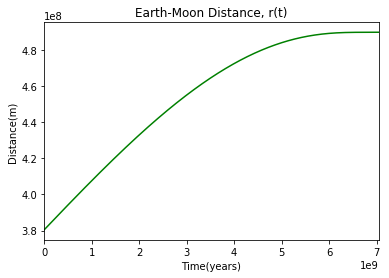

In [11]:
r=(Y**(1/3))*moon**(-2/3)
plt.plot(ts, r, c='green')
plt.xlim(0,ts[np.where(moon/earth < 0.99)][-1])
plt.xlabel("Time(years)")
plt.ylabel("Distance(m)")
plt.title('Earth-Moon Distance, r(t)')

r(0)

In [12]:
print(str((Y**(1/3))*moon[0]**(-2/3))+ " m")

380405712.7192103 m


r(t) when ω(t)/Ω(t) = 1

In [13]:
print(str((Y**(1/3))*moon[-1]**(-2/3))+" m")

489728491.851162 m


r(t) when ω(t)/Ω(t) <= 0.99

In [14]:
print(str((Y**(1/3))*moon[np.where(moon/earth <= 0.99)][-1]**(-2/3))+ " m")

489726597.335154 m
